In [110]:
from utils import synthetic_data as synth
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


In [ ]:
D = 1.0           # object distance
r_p = 0.004 # radius of pupil
e = 0.006       # eccentricity of light source
R = -2.00          # corrective lens diopter
D_cyl = -4.0     # cylinder lens diopter
axis = 0        # axis of cylinder lens
eps = 0.000001
axis = np.deg2rad(axis-90 + eps) # convert axis to radians
l_eye = 1/60

im_w = 50

In [112]:
camera_pos = (0, 0, D)
light_pos = (e, 0, D)
lens_pos = (0, 0, 0)
retina_pos = (0, 0, -l_eye)

In [113]:
scene = synth.Scene(camera_pos, light_pos, lens_pos, retina_pos, R, D_cyl, axis, r_p, D)

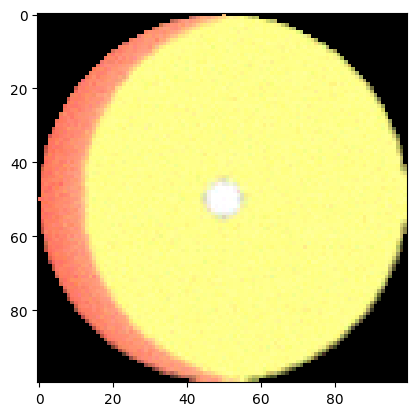

In [114]:
render = scene.render(shade=True, blur=True, glow=True)
plt.imshow(render)

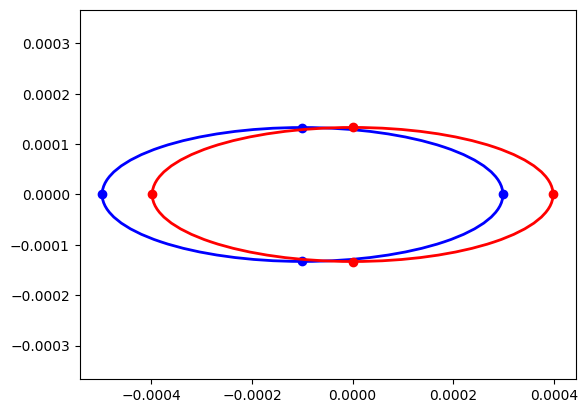

In [115]:
#plot first 2 coords of hits
# set axes equal
light_hits = scene.light_hits
camera_hits = scene.camera_hits


light_w = np.linalg.norm(light_hits[0] - light_hits[1])
light_h = np.linalg.norm(light_hits[2] - light_hits[3])
light_center = np.mean(light_hits[0:4], axis=0)
light_ellipse = Ellipse(xy=(light_center[:-1]), width=light_w, height=light_h, angle=np.rad2deg(axis),
                        edgecolor='b', fc='None', lw=2)

camera_w = np.linalg.norm(camera_hits[0] - camera_hits[1])
camera_h = np.linalg.norm(camera_hits[2] - camera_hits[3])
camera_center = np.mean(camera_hits[0:4], axis=0)
camera_ellipse = Ellipse(xy=(camera_center[:-1]), width=camera_w, height=camera_h, angle=np.rad2deg(axis),
                        edgecolor='r', fc='None', lw=2)

fig, ax = plt.subplots()
ax.add_patch(light_ellipse)
ax.set_aspect('equal', adjustable='datalim')
ax.scatter(light_hits[:,0], light_hits[:,1], c='blue')
ax.scatter(camera_hits[:,0], camera_hits[:,1], c='red')

ax.add_patch(camera_ellipse)
plt.show()

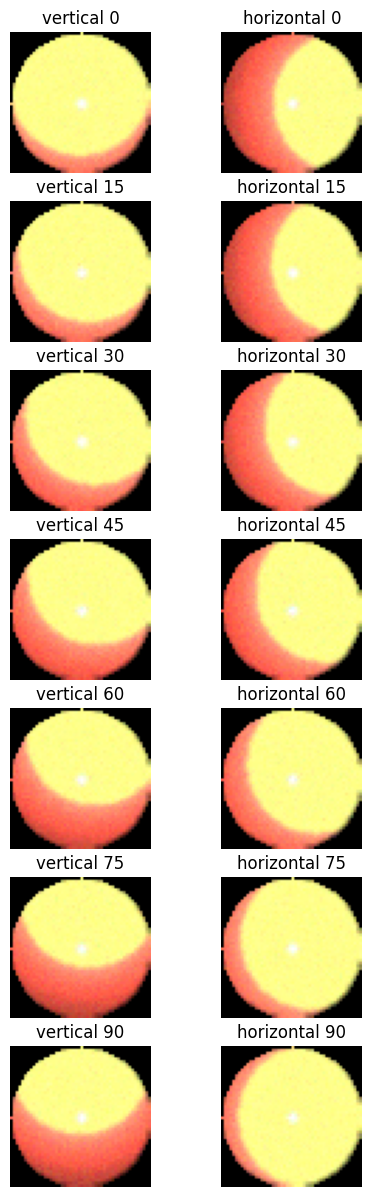

In [116]:
# figure with 9 subplots
fig, axs = plt.subplots(7, 2, figsize=(5, 15))
k = 0
for i in range(7):
    axis = i * 15
    for j in range(2):
        success = False
        fails = 0
        if j % 2 == 0:
            light_pos = (0, e, D)
            orientation = 'vertical'
        else:
            light_pos = (e, 0, D)
            orientation = 'horizontal'

        while not success and fails < 10:
            success = True
            try:
                axis_rad = np.deg2rad(axis + eps)
                scene = synth.Scene(camera_pos, light_pos, lens_pos, retina_pos, R, D_cyl, axis_rad, r_p, D, im_w, im_w)
                render = scene.render(shade=True, blur=True, glow=True)
            except ValueError:
                eps += 0.00001
                fails += 1
                success = False
        if success:
            axs[i, j].imshow(render)
        axs[i, j].set_title(f"{orientation} {axis}")
        axs[i, j].axis("off")
plt.show()